# Plotly & Seaborn
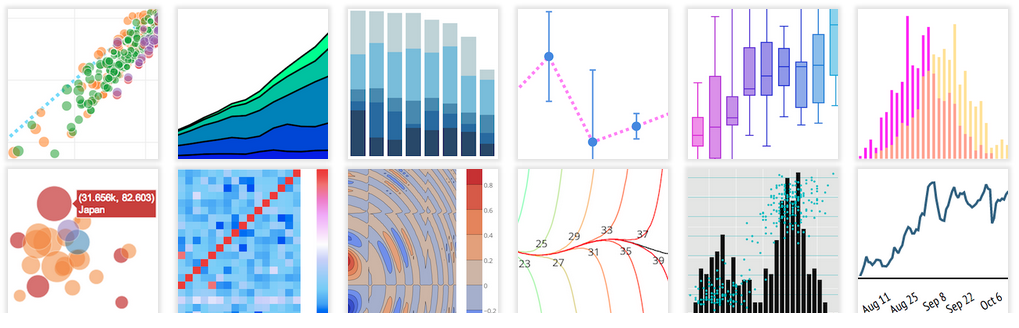

## Install Libraries

In [39]:
%%time
!pip install pandas numpy matplotlib seaborn plotly missingno nbformat scikit-learn

  Using cached scikit_learn-1.4.0-1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
Using cached scikit_learn-1.4.0-1-cp310-cp310-win_amd64.whl (10.6 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
CPU times: total: 0 ns
Wall time: 10.6 s


## Import Libraries

In [2]:
%%time
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import warnings

## Setting visualization libraries

In [3]:
%%time
warnings.filterwarnings('ignore')
pio.templates.default ='plotly_dark'
sns.color_palette('husl',12)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.903599057664843, 0.511987276335809, 0.19588350060161624),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20312757197899856, 0.6881249249803418, 0.5177618167447304),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21786710662428366, 0.6656671601322255, 0.7482809385065813),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225),
 (0.9633321742064956, 0.40643825645731757, 0.7592537599568671)]

## Starter Code
### Get data

In [4]:
%%time
data = pd.read_csv('StudentsPerformance.csv')
data.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

### Dataset description

|Feature|More Info|
|-|-|
| **gender** | [male, female] |
| **race/ethnicity** | [group A to E ] |
| **parental level of education** | categorical value|
| **lunch** |	|
| **test preparation course**	||
| **math score** | numeric score (int, not float) |
| **reading score** | numeric score (int, not float) |
| **writing score** | numeric score (int, not float) |



We can check the test score distribution by gender, group, parental education level, and the correlation between test scores.



### Before we start Plotly...

- Plotly's main object is `Figure()` object.
- `add_trace` can consider as *'stacking figures'*. 
- I will use these libraries :
    - `import plotly.graph_objects as go`
    - `import plotly.express as px`
    - `import plotly.figure_factory as ff`


### Check Null Data

Check Nan/Null value first.

<Axes: >

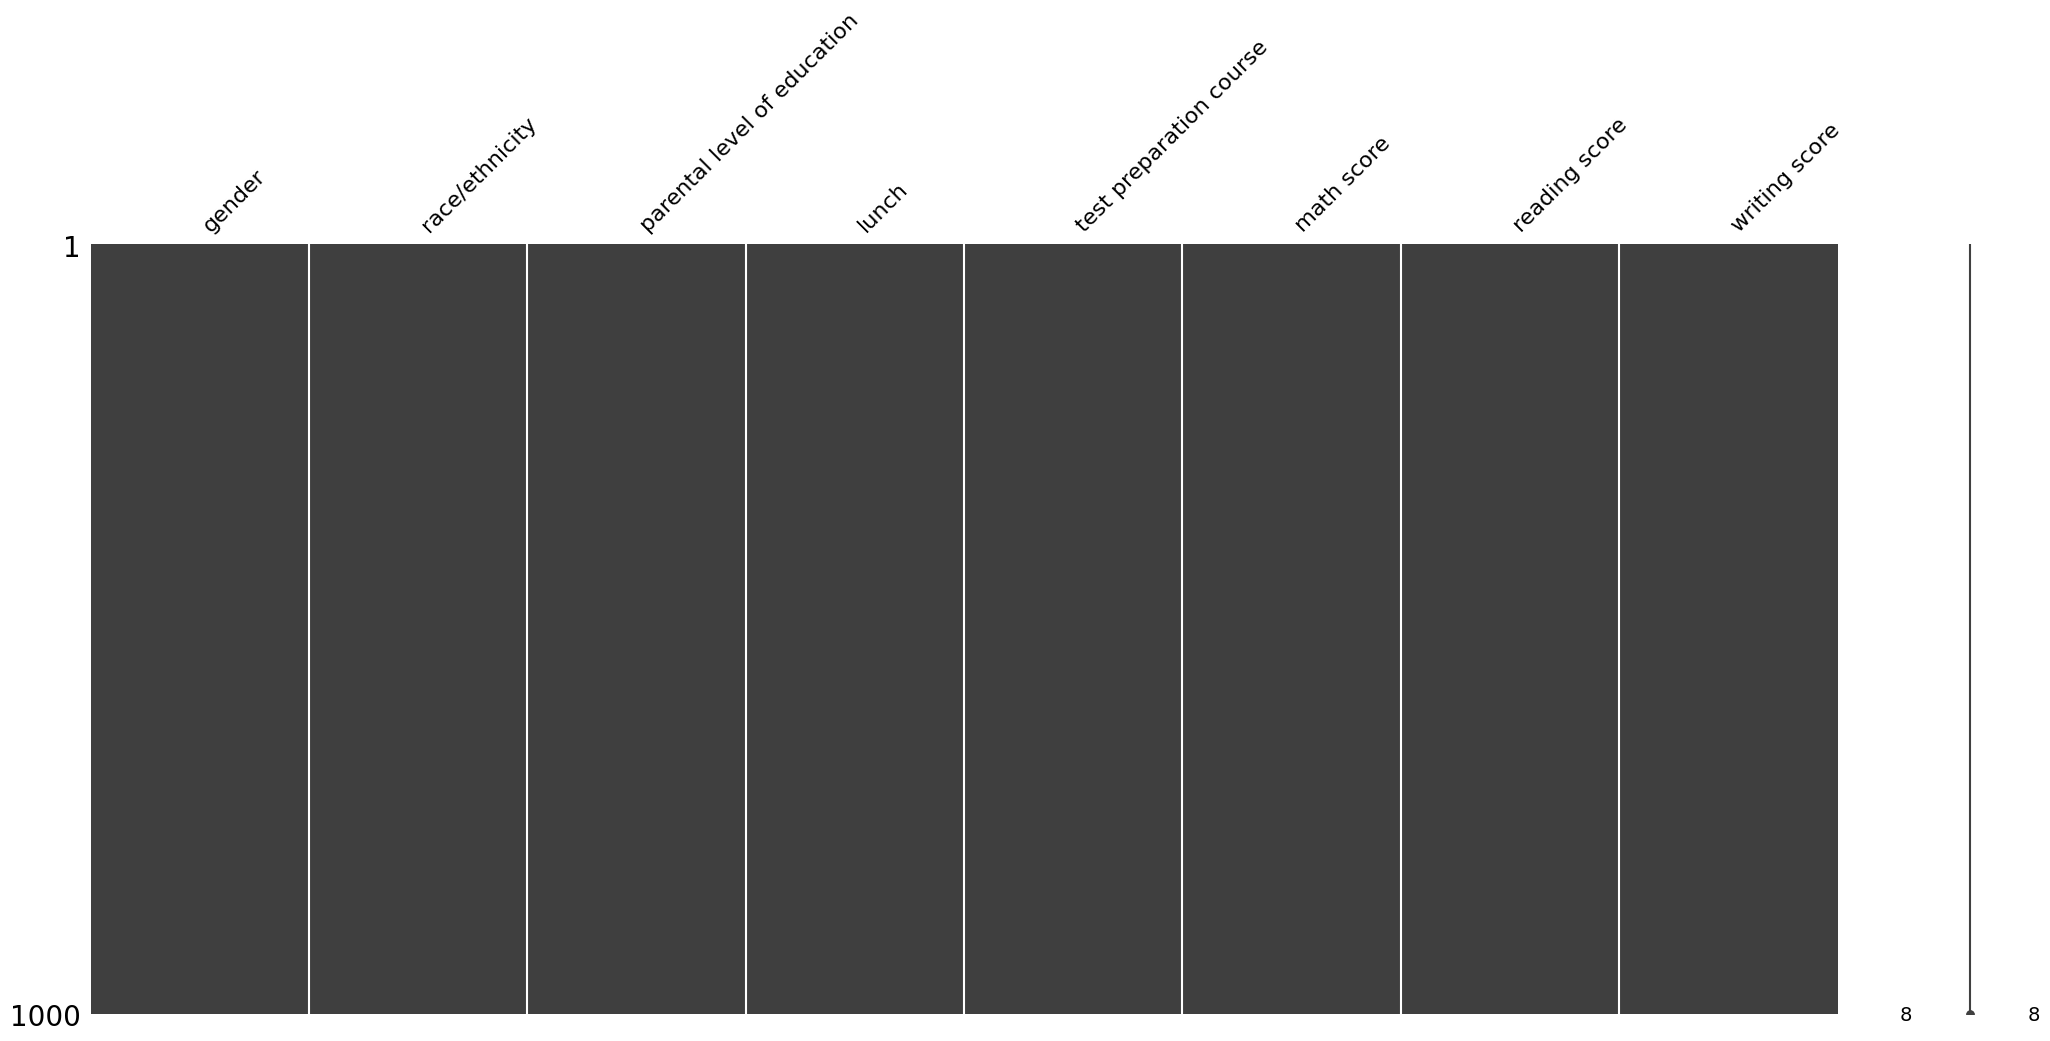

In [5]:
%%time
msno.matrix(data)

## Table View

### Default notebook

In [6]:
%%time
data.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

### Plotly: go.Table

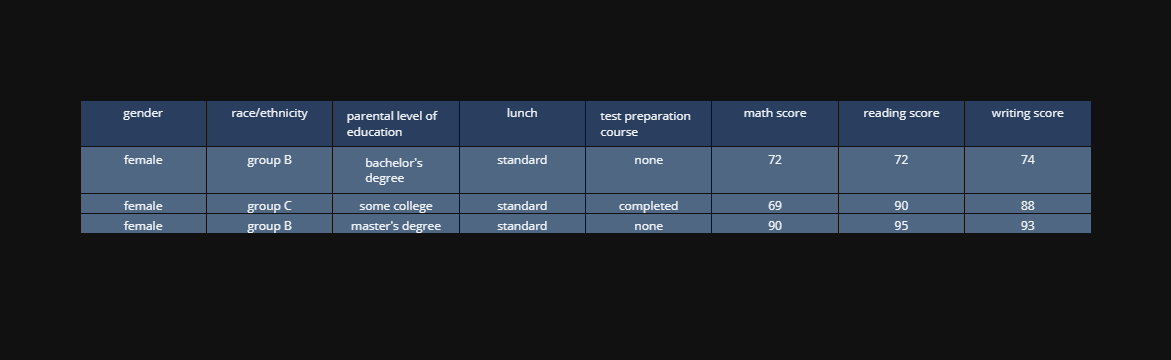

In [7]:
%%time
# Type 1 : default
fig = go.Figure()

fig.add_trace(
    go.Table(header=dict(values=data.columns),
            cells=dict(values=data.head(3).T))
)

fig.show()

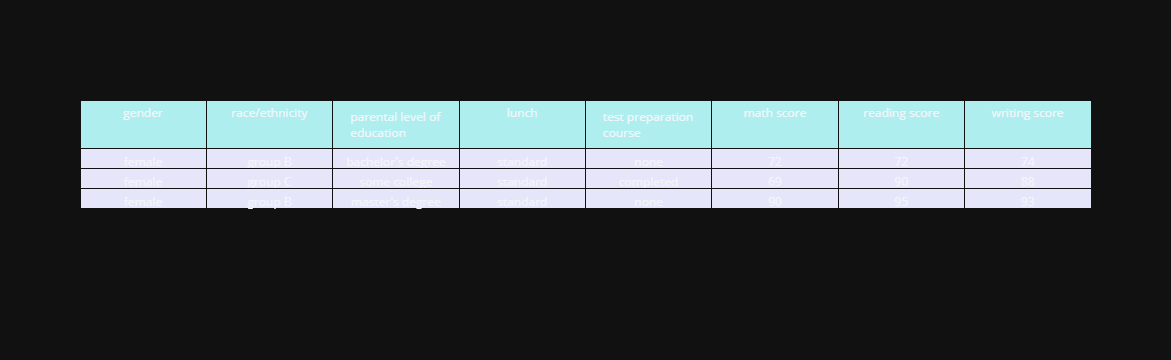

In [10]:
%%time
# Type 2 : change color
fig = go.Figure()

fig.add_trace(
    go.Table(header=dict(values=data.columns, fill_color='paleturquoise'),
            cells=dict(values=data.head(3).T, fill_color='lavender'))
            )

fig.show()

## Count Plot

### Seaborn : counplot, barplot + value_counts()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


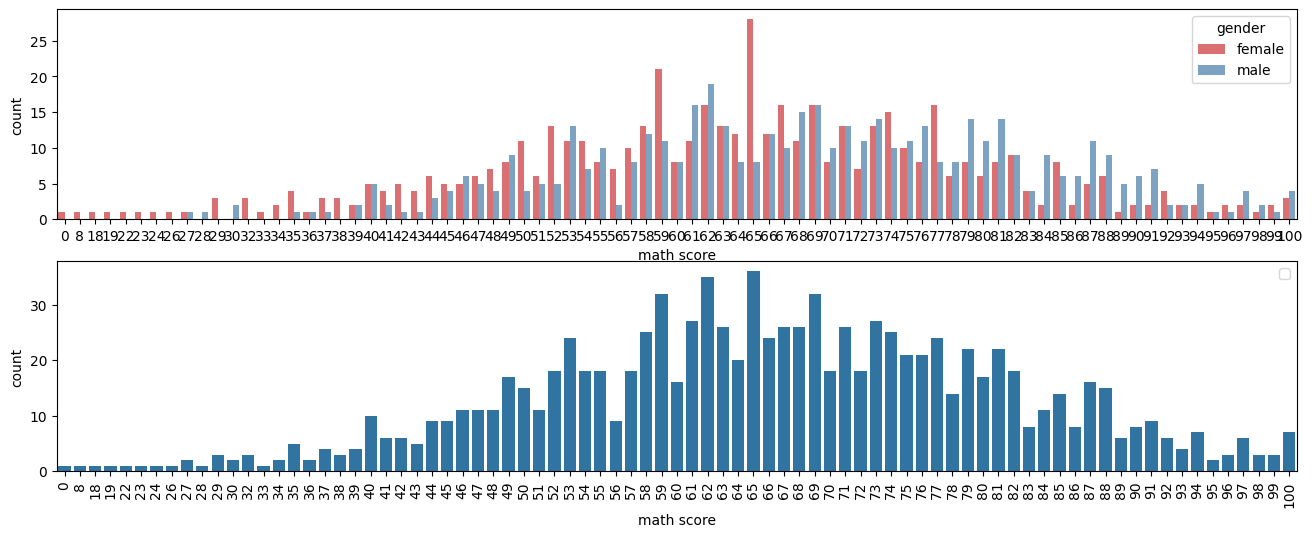

In [14]:
%%time
fix, ax = plt.subplots(2,1,figsize=(16,6))
# Type 1 : use hue parameter
sns.countplot(x='math score', data=data, hue='gender', palette='Set1', alpha=0.7, ax=ax[0])
plt.legend()
plt.xticks(rotation='vertical')

# Type 2 : use value_counts + barplot / hard to divide like hue
sns.barplot(x=data['math score'].value_counts().index, y=data['math score'].value_counts(), ax=ax[1])
plt.show()

### Plotly : px.histogram, go.Histogram

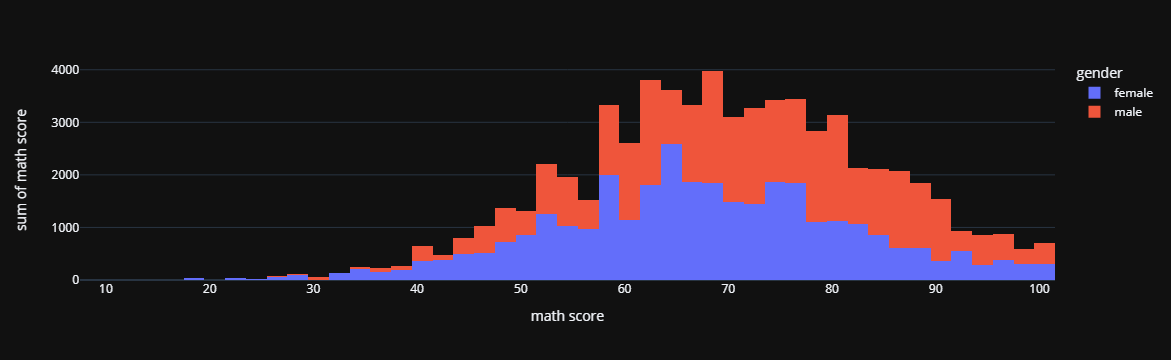

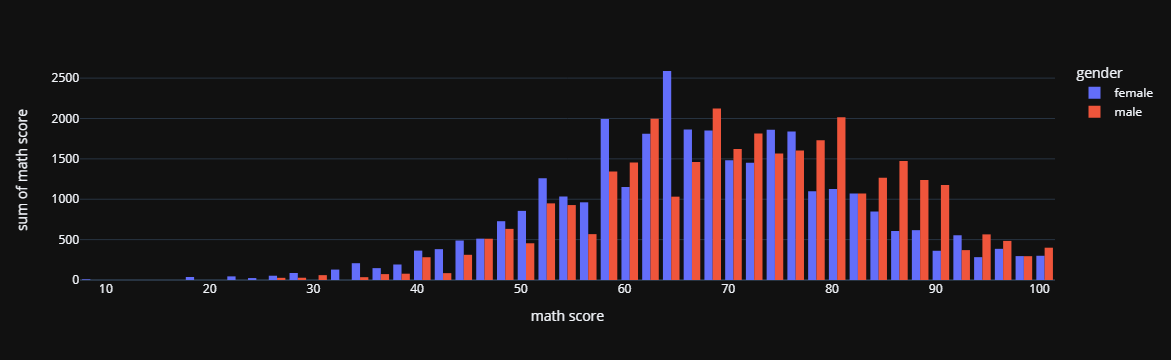

In [15]:
%%time
# Type 1 : Stacked graph (default)
fig = px.histogram(data, x="math score", y="math score", color="gender")
fig.show()

# Type 2 : Group
fig = px.histogram(data, x="math score", y="math score", color="gender")
fig.update_layout(barmode="group")
fig.show()

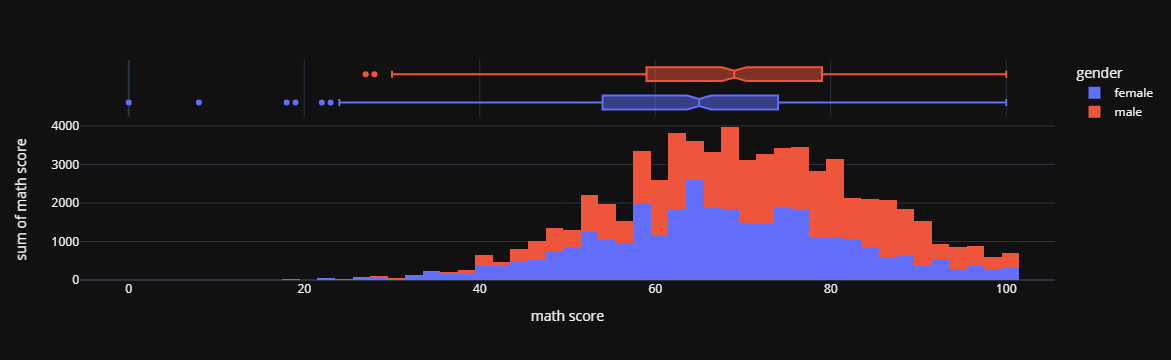

In [16]:
%%time
fig = px.histogram(data, x="math score", y="math score", color="gender", marginal="box" # or violin, rug
                  )
fig.show()

## Dist Plot

### Seaborn : Distplot

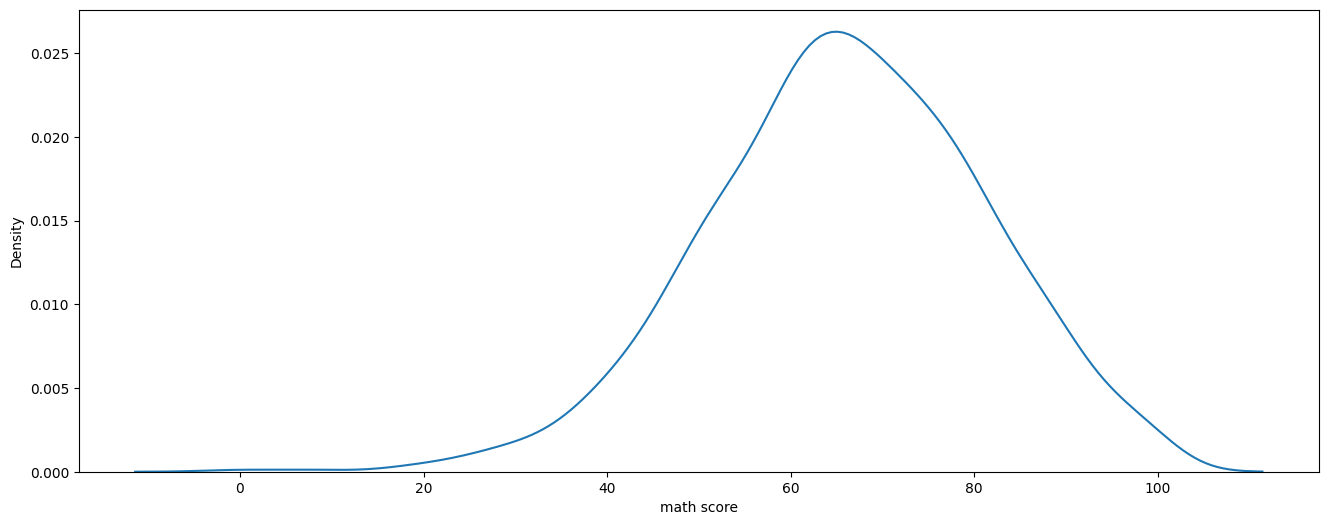

In [17]:
%%time
# Type 1 : default view
fig, ax = plt.subplots(1,1,figsize=(16,6))
sns.kdeplot(data["math score"])
plt.show()

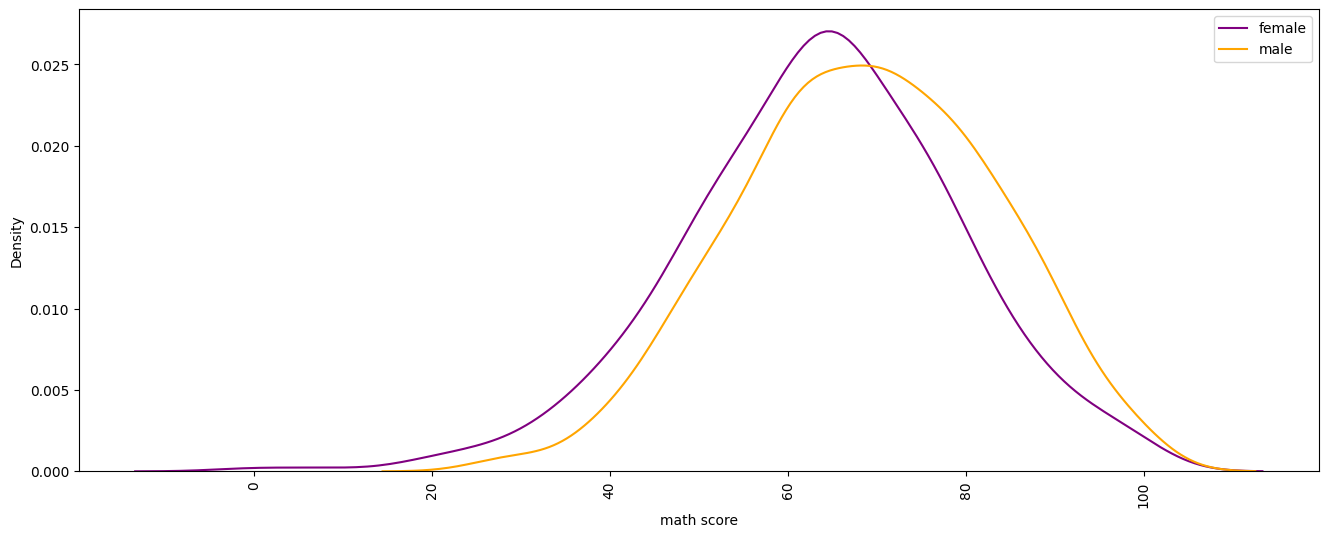

In [18]:
%%time
# Type 2 : Draw 2 graph with label
fig, ax = plt.subplots(1,1,figsize=(16,6))
sns.kdeplot(data[data["gender"]=="female"]["math score"], color="purple", ax=ax, label="female")
sns.kdeplot(data[data["gender"]=="male"]["math score"], color="orange", ax=ax, label="male")
plt.xticks(rotation="vertical")
plt.legend()
plt.show()

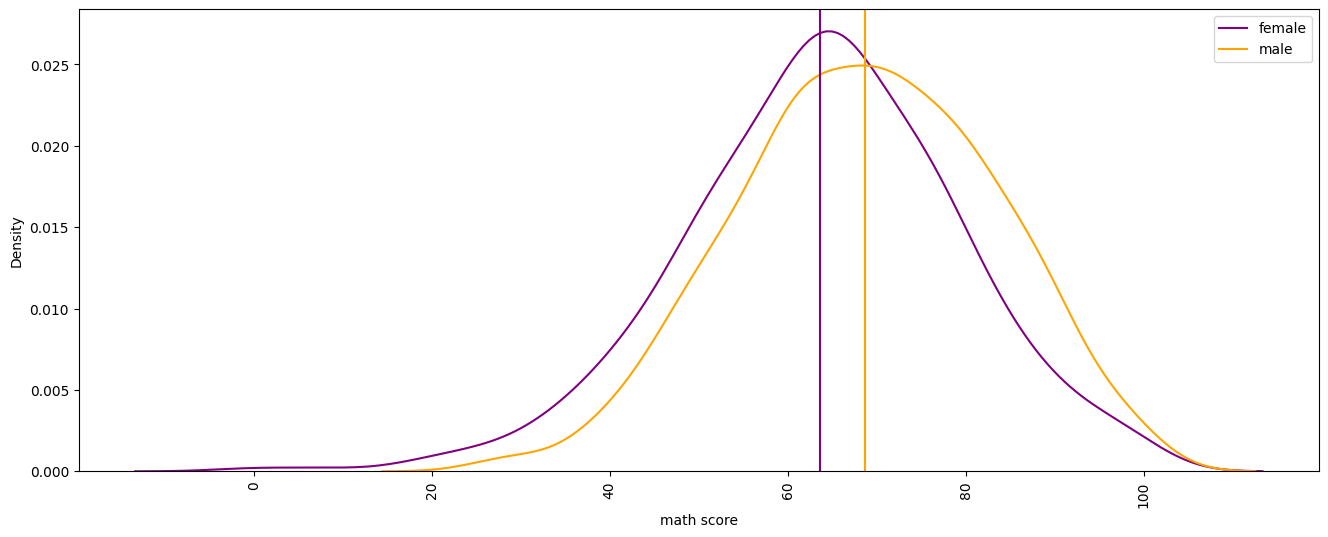

In [19]:
%%time
# Type 3 : Add avg line
fig, ax = plt.subplots(1,1,figsize=(16,6))
sns.kdeplot(data[data["gender"]=="female"]["math score"], color="purple", ax=ax, label="female")
sns.kdeplot(data[data["gender"]=="male"]["math score"], color="orange", ax=ax, label="male")

# avg line
plt.axvline(data[data['gender']=="female"]["math score"].mean(), color="purple")
plt.axvline(data[data["gender"]=="male"]["math score"].mean(), color="orange")

plt.legend()
plt.xticks(rotation="vertical")
plt.show()

### Plotly : ff.create_distplot

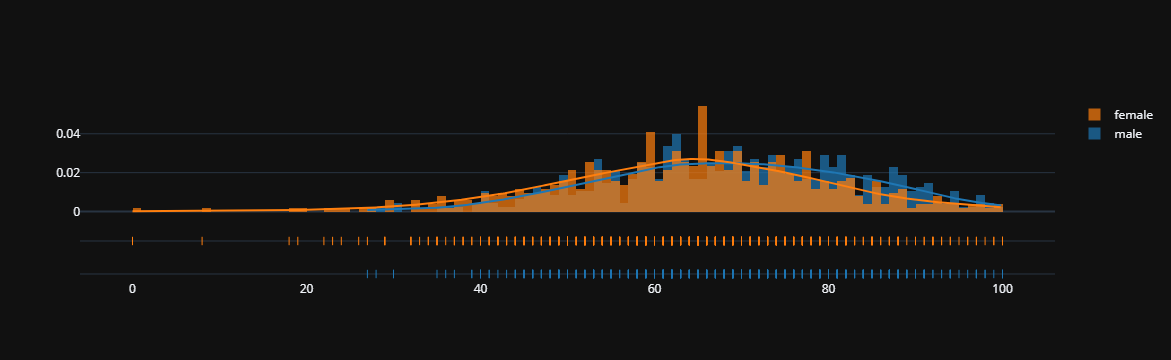

In [20]:
%%time
# Type 1 : default
import plotly.figure_factory as ff

fig = ff.create_distplot([data[data["gender"]=="male"]["math score"], data[data["gender"]=="female"]["math score"]], ["male","female"])
fig.show()

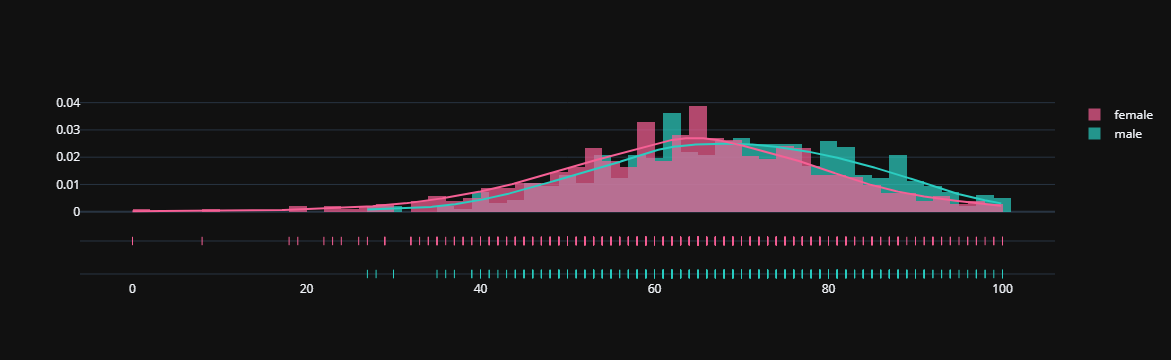

In [21]:
%%time
# Type 2 : Add colur and change bin with
fig = ff.create_distplot([data[data["gender"]=="male"]["math score"], data[data["gender"]=="female"]["math score"]],
                         ["male", "female"], colors=["#2BCDC1", "#F66095"],
                         bin_size=[2,2])
fig.show()

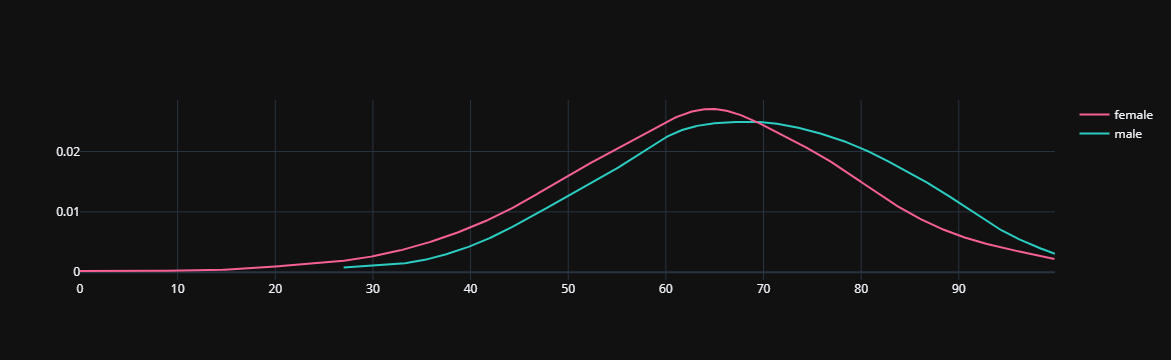

In [25]:
%%time
# Type 3 : Change view (rug, hist, curve)
fig = ff.create_distplot([data[data["gender"]=="male"]["math score"], data[data["gender"]=="female"]["math score"]], 
                         ["male", "female"], colors=["#2BCDC1", "#F66095"], bin_size=[2,2],
                         show_rug=False, # rug
                         show_hist=False, # hist
                         show_curve=True # curve
                        )
fig.show()

## Scatter Plot

### Seaborn : Scatter plot

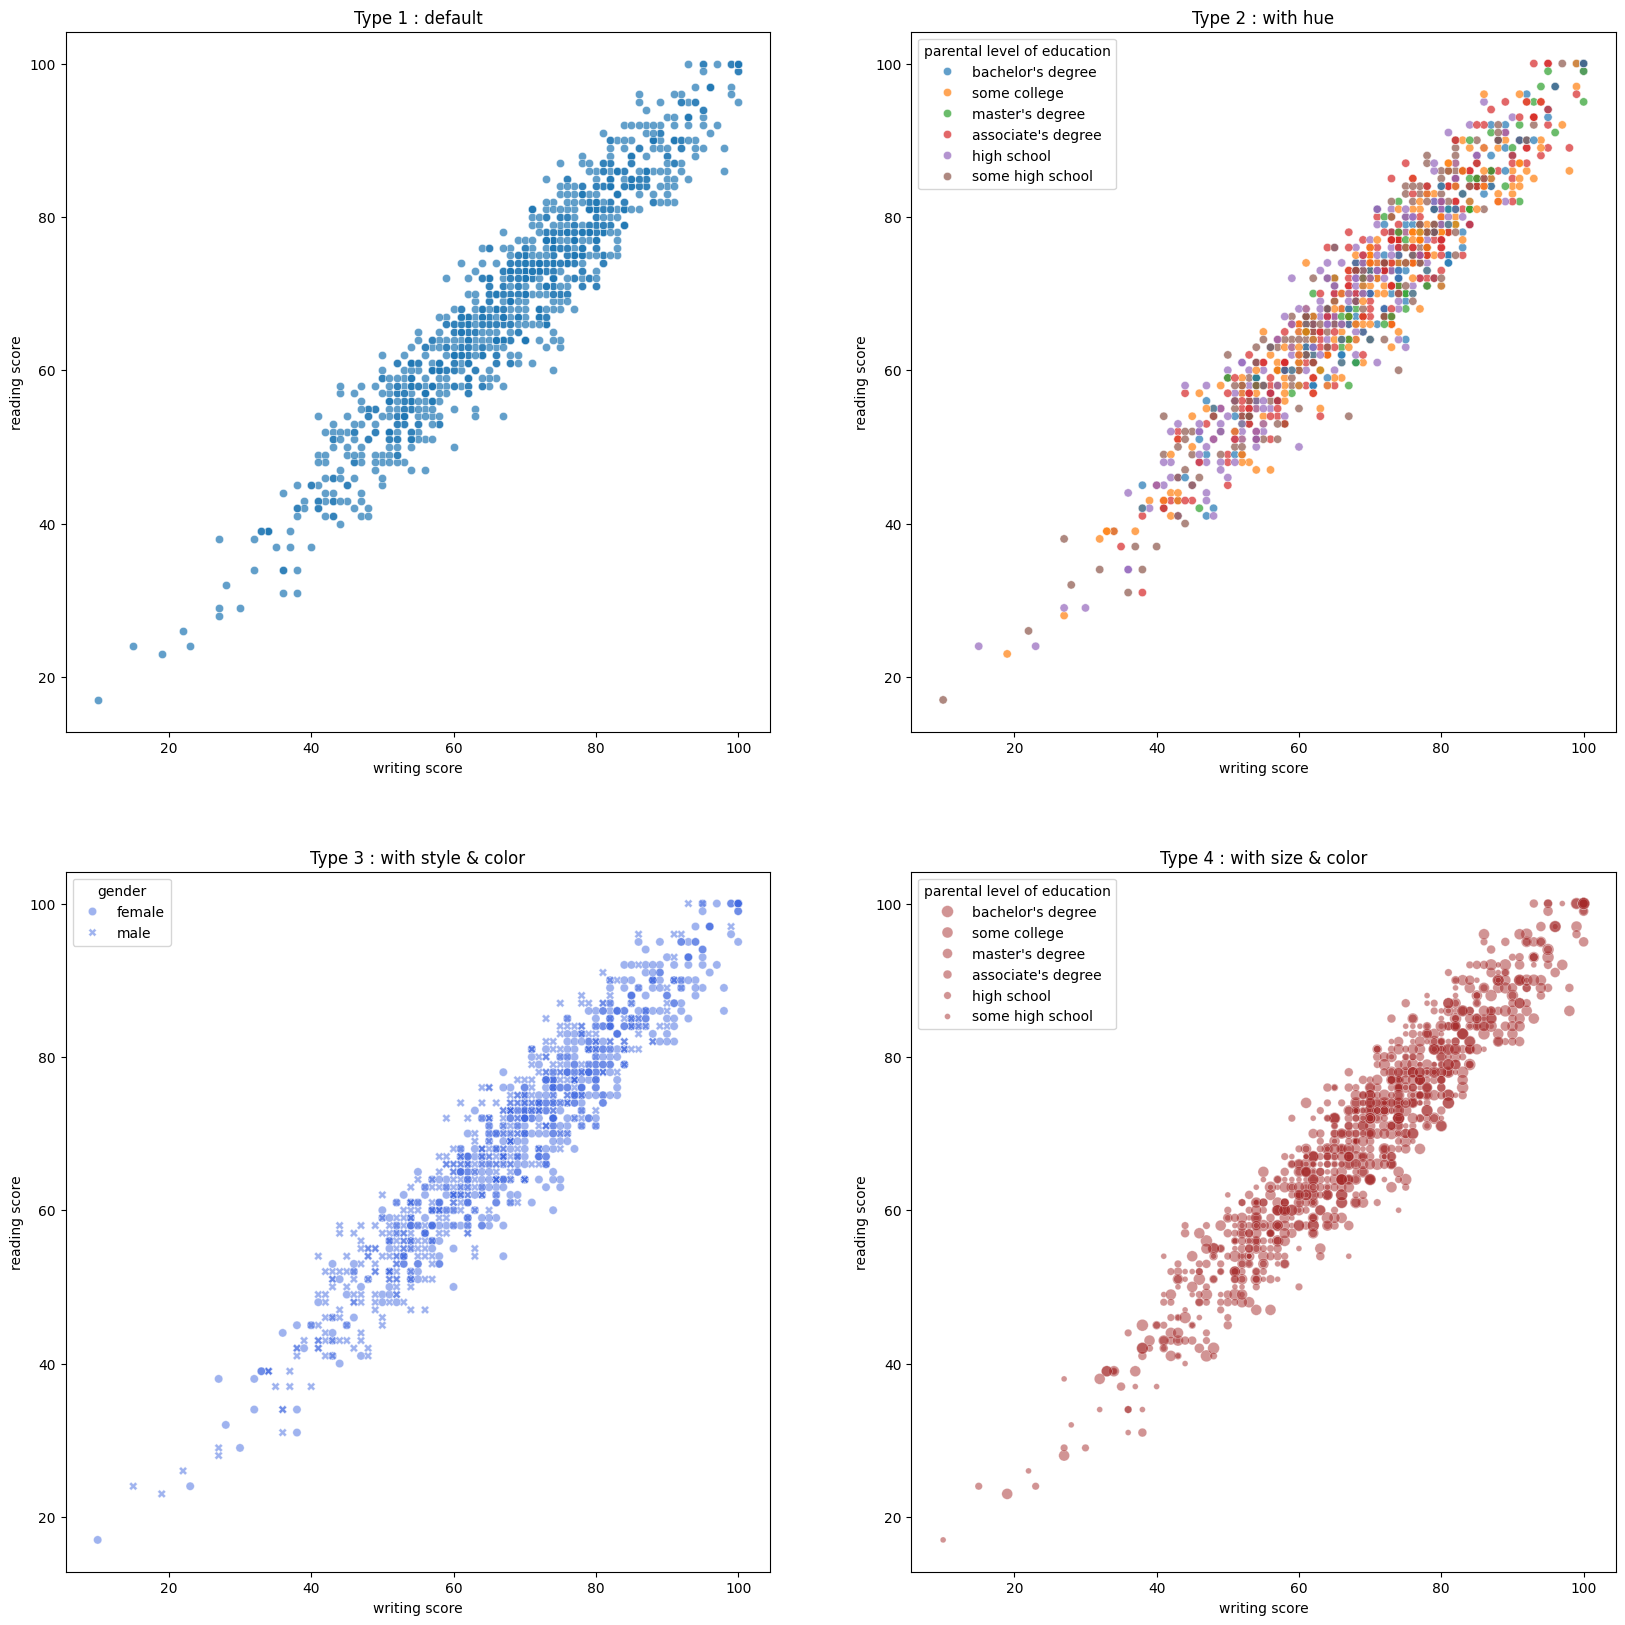

In [30]:
%%time
fig, ax = plt.subplots(2,2, figsize=(20,20))

# Type 1 : default scatter plot
sns.scatterplot(data=data, x="writing score", y="reading score", alpha=0.7, ax=ax[0][0]).set(title="Type 1 : default")

# Type 2 : with hue
sns.scatterplot(data=data, x="writing score", y="reading score", hue="parental level of education", alpha=0.7, ax=ax[0][1]).set(title="Type 2 : with hue")

# Type 3 : with style & color
sns.scatterplot(data=data, x="writing score", y="reading score", style="gender", color="royalblue", alpha=0.5, ax=ax[1][0]).set(title="Type 3 : with style & color")

# Type 4: with size & color
sns.scatterplot(data=data, x="writing score", y="reading score", size="parental level of education", color="brown", alpha=0.5, ax=ax[1][1]).set(title="Type 4 : with size & color")

plt.show()

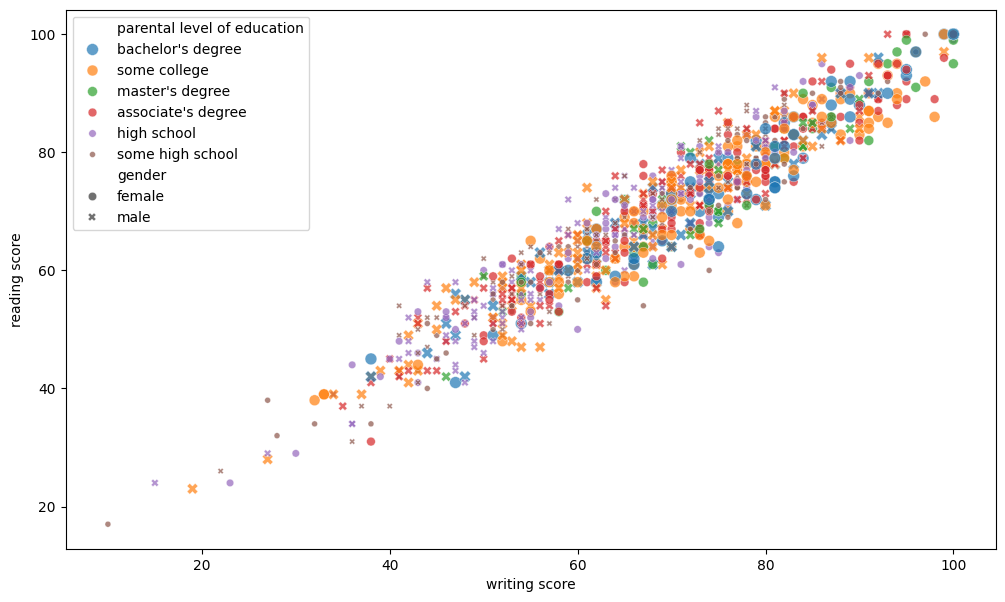

In [35]:
%%time
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.scatterplot(data=data, x='writing score', y='reading score', style='gender',hue='parental level of education',size='parental level of education', alpha=0.7)
plt.show()

### Plotly : px.scatter, go.Scatter, go.Scattergl

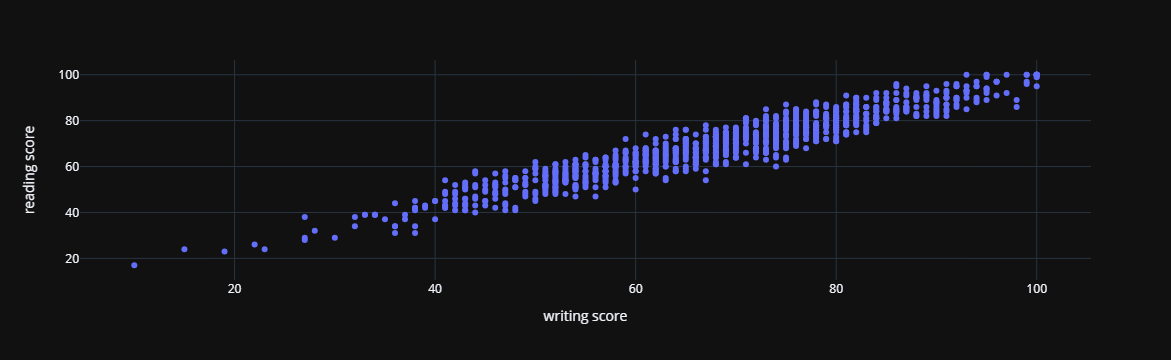

In [36]:
%%time
# Type 1 : Default
fig = px.scatter(data, x="writing score", y="reading score")
fig.show()

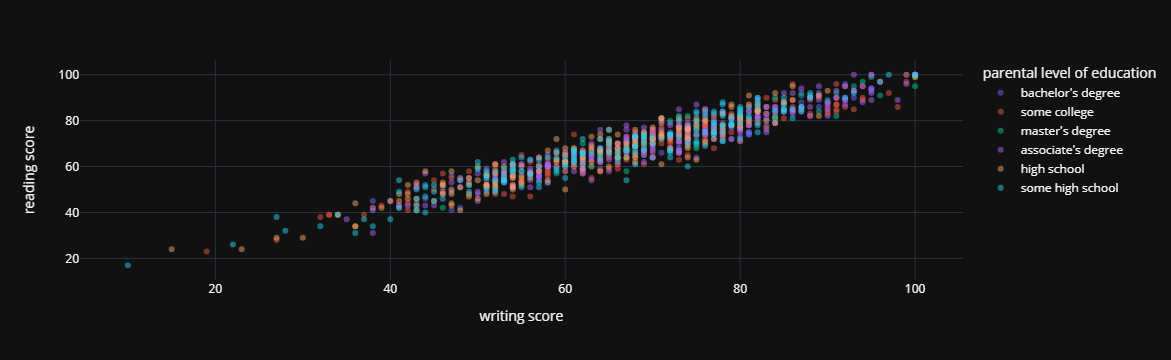

In [37]:
%%time
# Type 2 : use color as seaborn hue
fig = px.scatter(data, x="writing score", y="reading score", color="parental level of education", opacity=0.5)
fig.show()

In [41]:
%%time
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data["parental level of education"] = LE.fit_transform(data["parental level of education"])

CPU times: total: 0 ns
Wall time: 0 ns


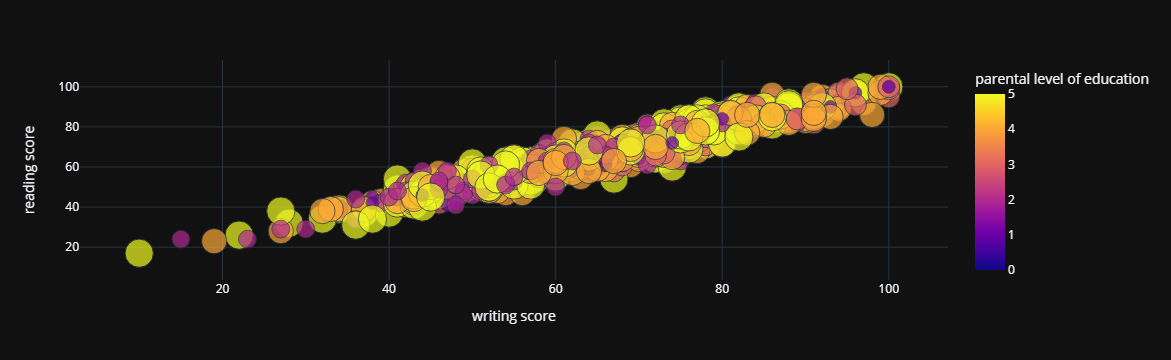

CPU times: total: 46.9 ms
Wall time: 45.7 ms


In [42]:
%%time
# Type 3: with size color
fig = px.scatter(data, x="writing score", y="reading score",
                 color="parental level of education", size="parental level of education")
fig.show()

## Box Plot

### Seaborn : boxplot, stripplot, swarmplot

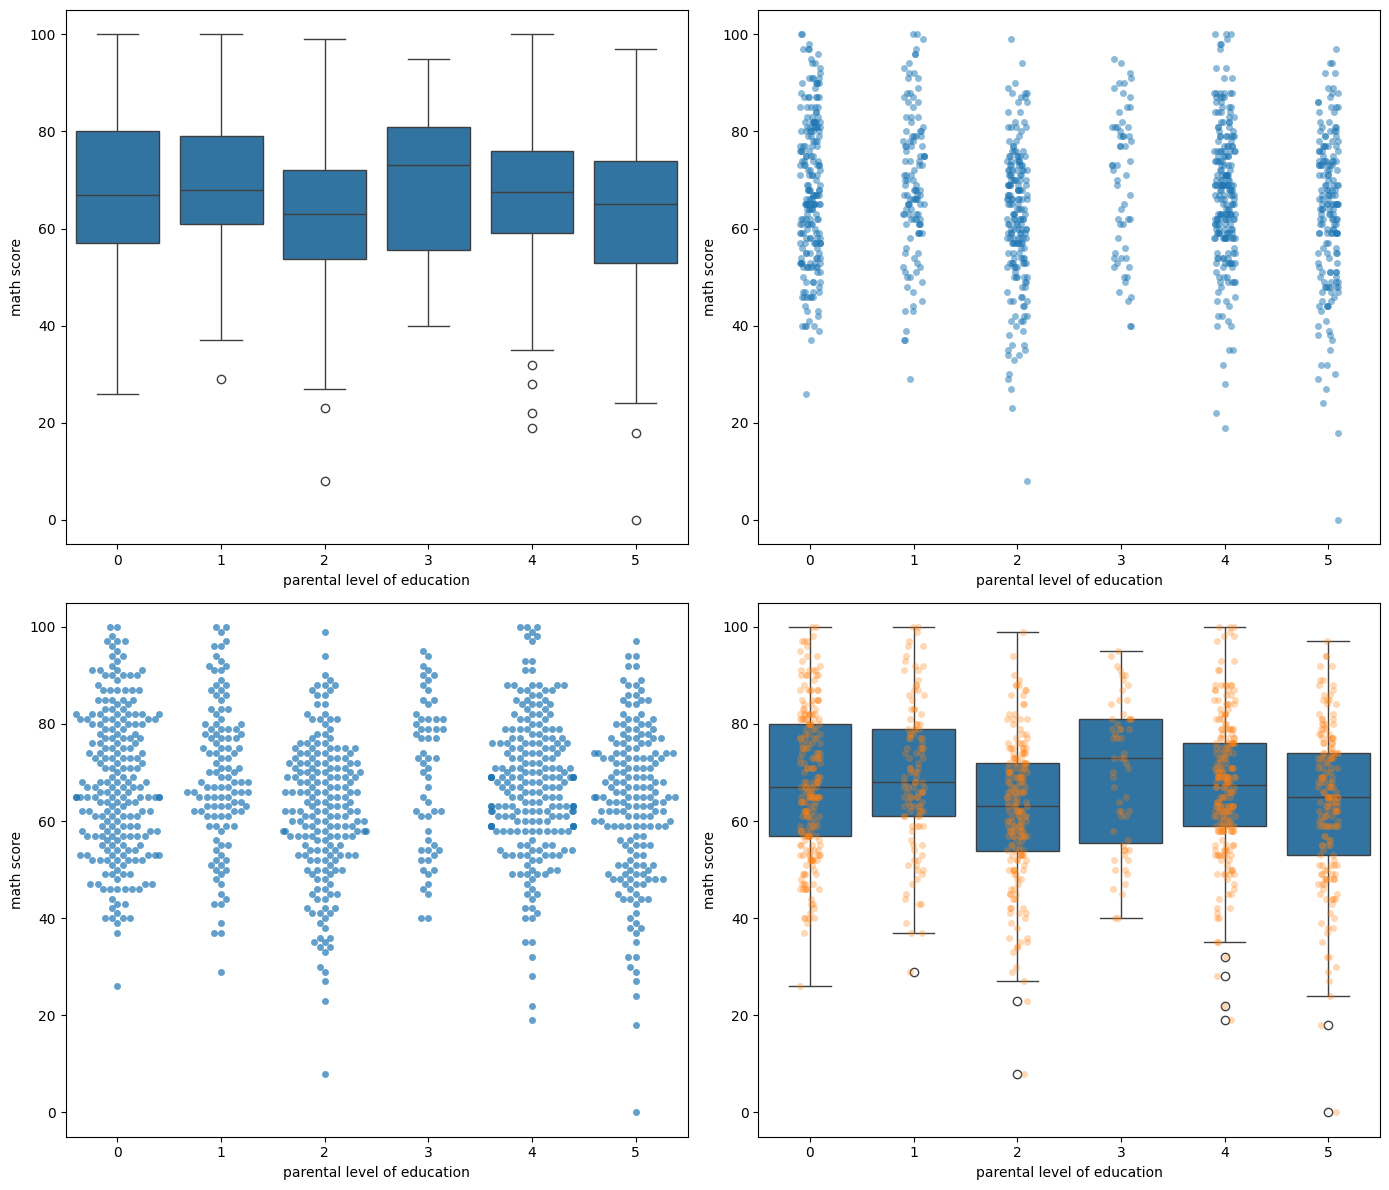

CPU times: total: 1.2 s
Wall time: 1.21 s


In [53]:
%%time
# Type 1 : default boxplot & stripplot
fig, ax = plt.subplots(2,2, figsize=(14,12))

# boxplot
sns.boxplot(x="parental level of education", y="math score", data=data, ax=ax[0][0])

# stripplot
sns.stripplot(x="parental level of education", y="math score", data=data, ax=ax[0][1], alpha=0.5)

# swarmplot
sns.swarmplot(x="parental level of education", y="math score", data=data, ax=ax[1][0], alpha=0.7)

# both
sns.boxplot(x="parental level of education", y="math score", data=data, ax=ax[1][1])
sns.stripplot(x="parental level of education", y="math score", data=data, ax=ax[1][1], alpha=0.3)

plt.tight_layout()
plt.show()

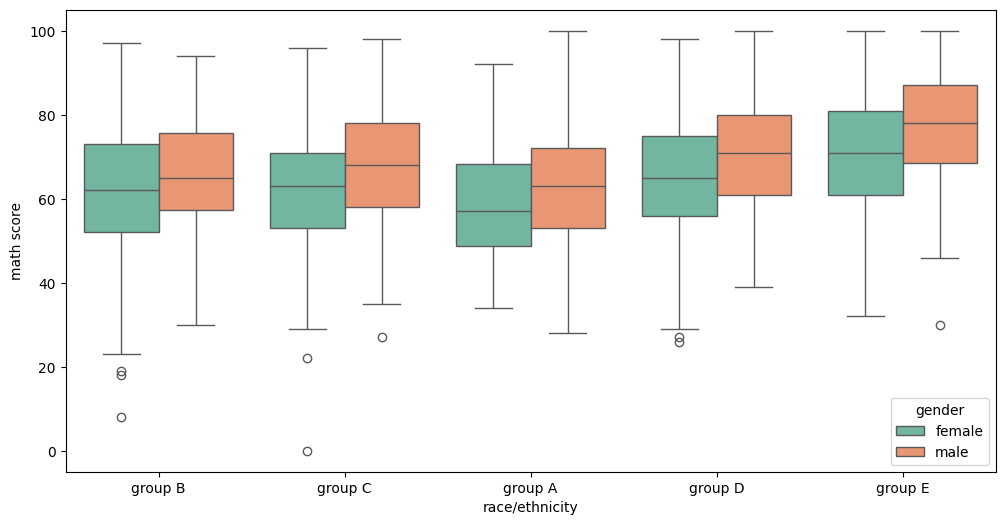

CPU times: total: 203 ms
Wall time: 214 ms


In [54]:
%%time
# Type 2 : we can add hue parameter
fig, ax = plt.subplots(1,1, figsize=(12,6))
sns.boxplot(x="race/ethnicity", y="math score", hue="gender", palette="Set2",data=data, ax=ax)
plt.show()

### Plotly : px.box, go.Box

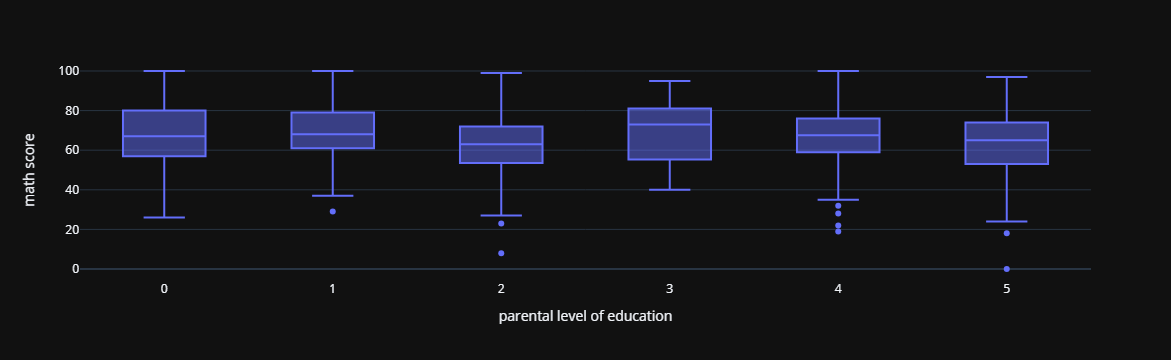

CPU times: total: 31.2 ms
Wall time: 30 ms


In [55]:
%%time
# Type 1 : default boxplot
fig = px.box(data, x="parental level of education", y="math score")
fig.show()

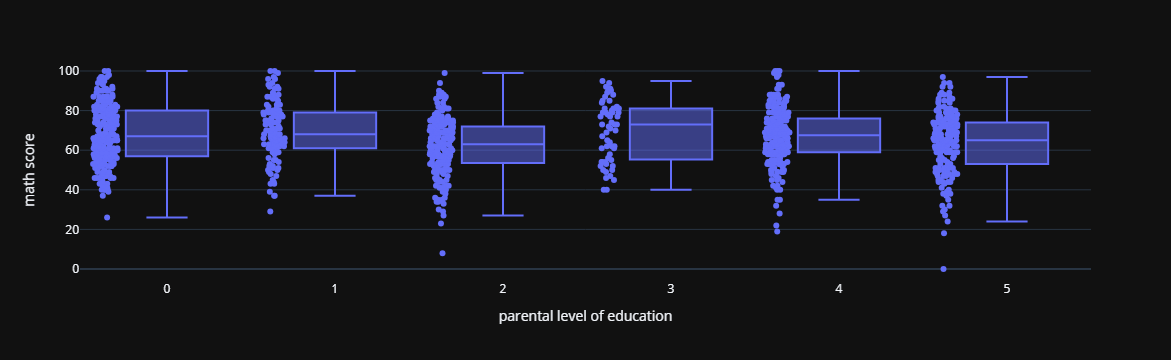

CPU times: total: 46.9 ms
Wall time: 35 ms


In [56]:
%%time
# Type 2 : boxplot with stripplot
fig = px.box(data, x="parental level of education", y="math score", points="all")
fig.show()

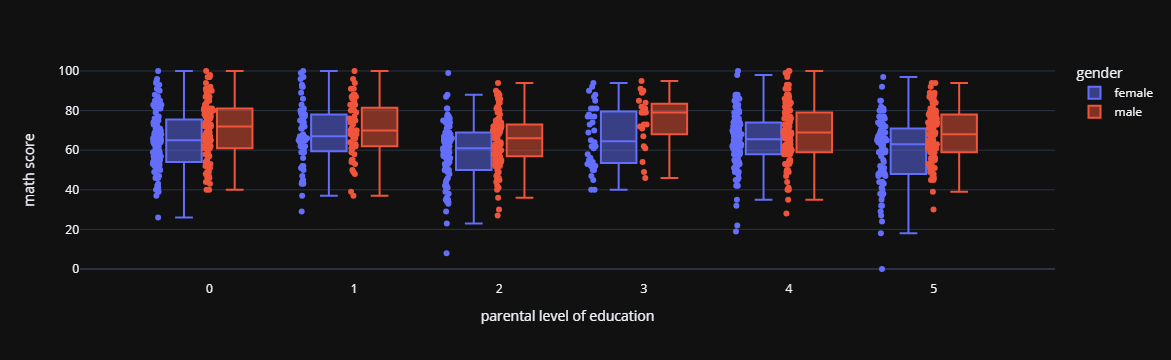

CPU times: total: 31.2 ms
Wall time: 34 ms


In [58]:
%%time
# Type 3 : boxplot with stripplot + color
fig = px.box(data, x="parental level of education", y="math score", color="gender", points="all")
fig.show()

## Violin Plot

### Seaborn : violinplot

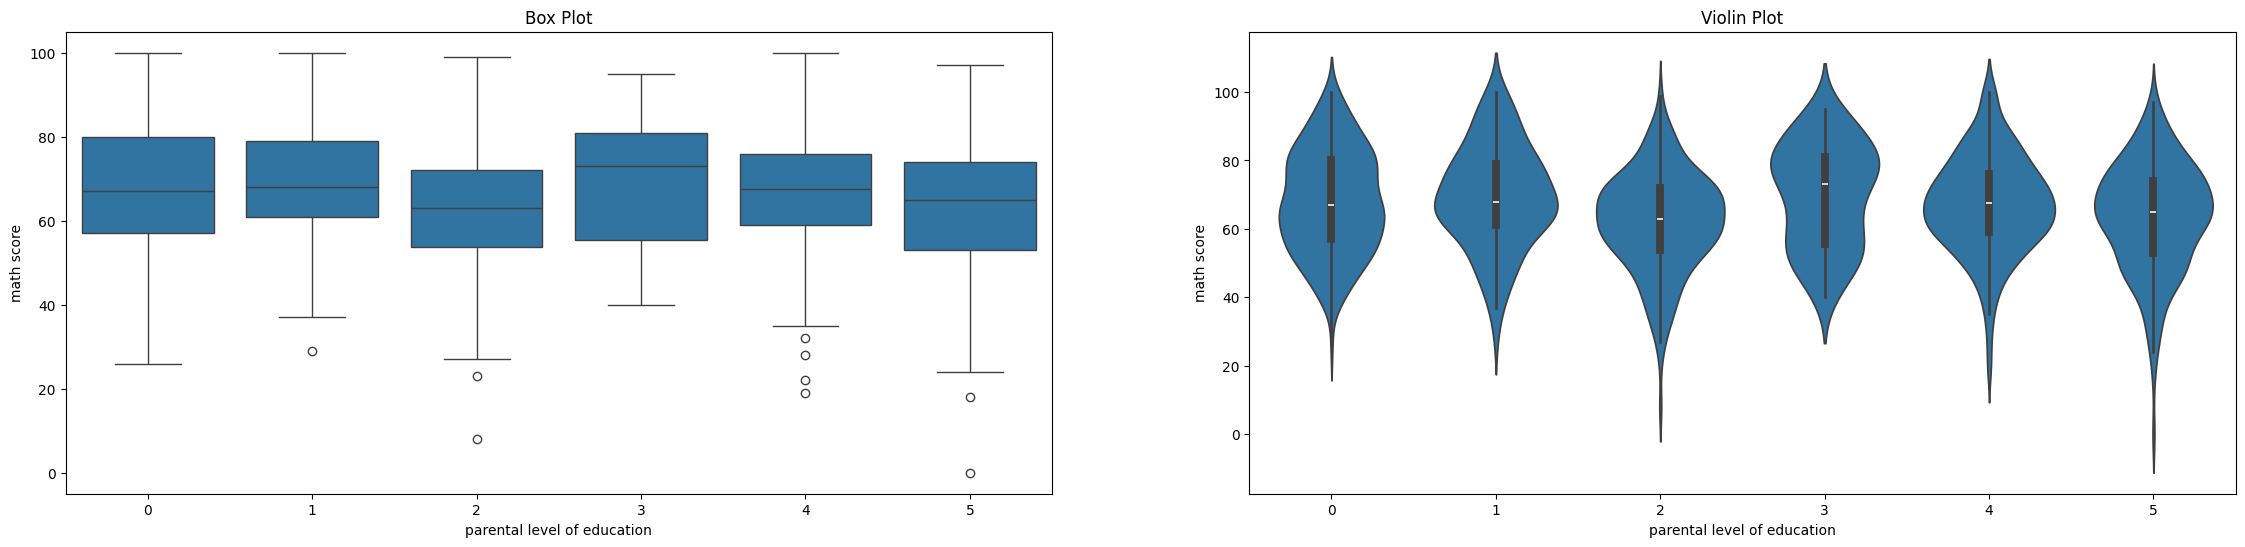

CPU times: total: 328 ms
Wall time: 302 ms


In [60]:
%%time
# Type 1 : compare with boxplot
fig, ax = plt.subplots(1,2, figsize=(28,6))

# boxplot
sns.boxplot(x="parental level of education", y="math score", data=data, ax=ax[0]).set(title="Box Plot")

# violinplot
sns.violinplot(x="parental level of education", y="math score", data=data, ax=ax[1]).set(title="Violin Plot")

plt.show()

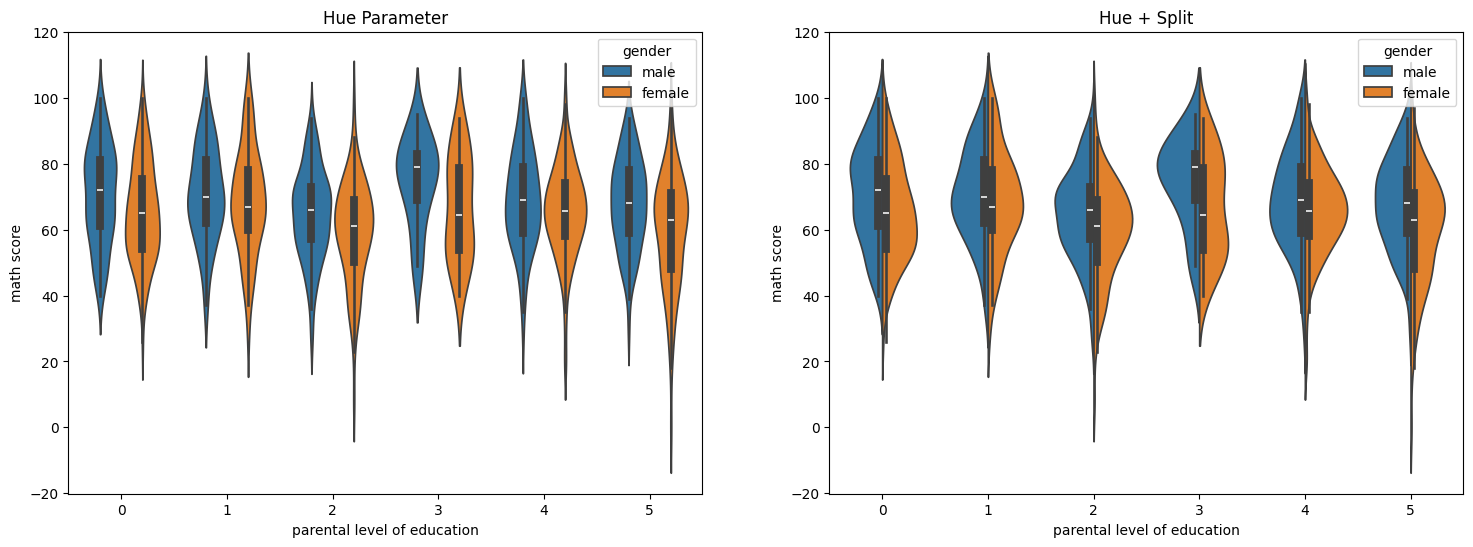

CPU times: total: 484 ms
Wall time: 486 ms


In [62]:
%%time
# Type 2 : hue parameter
fig, ax = plt.subplots(1,2, figsize=(18,6))
sns.violinplot(x="parental level of education", y="math score", hue="gender", data=data, ax=ax[0]).set(title='Hue Parameter')

# Type 3 : hue + split
sns.violinplot(x="parental level of education", y="math score", hue="gender", split=True, data=data, ax=ax[1]).set(title="Hue + Split")

plt.show()

### Plotly : px.violin, go.Violin

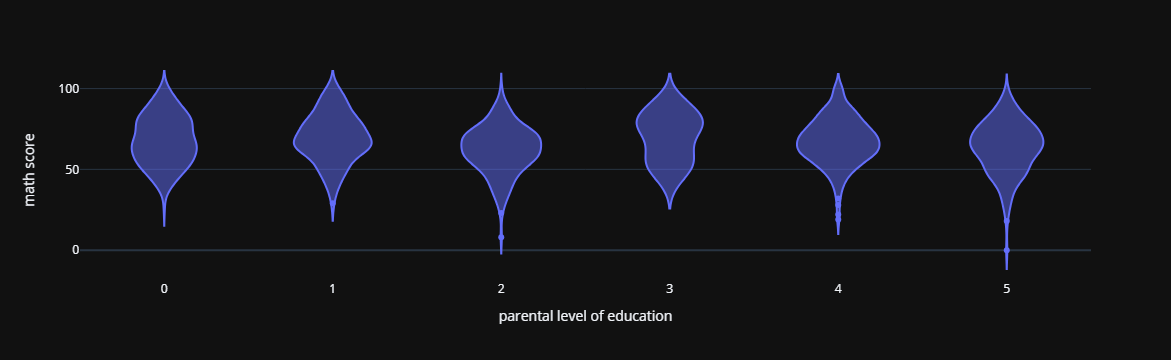

CPU times: total: 46.9 ms
Wall time: 41 ms


In [63]:
%%time
# Type 1 : default violineplot
fig = px.violin(data, x="parental level of education", y="math score")
fig.show()

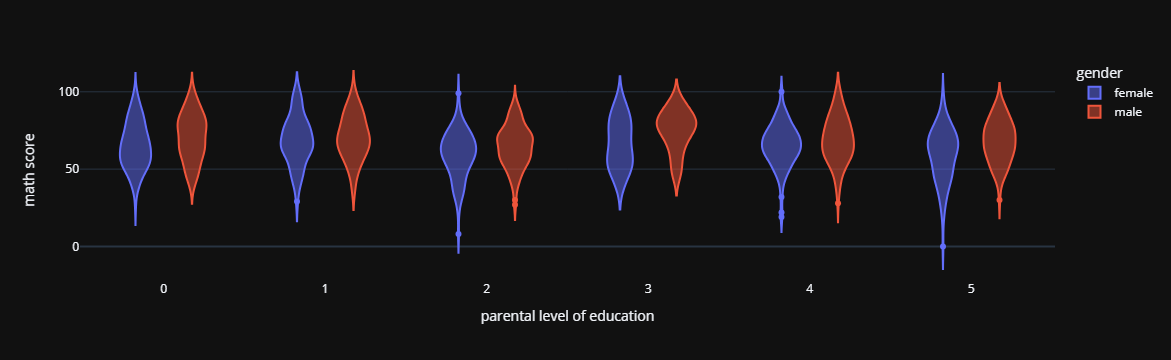

CPU times: total: 46.9 ms
Wall time: 35 ms


In [66]:
%%time
# Type 2 : color add violin
fig = px.violin(data, x="parental level of education", y="math score", color="gender")
fig.show()

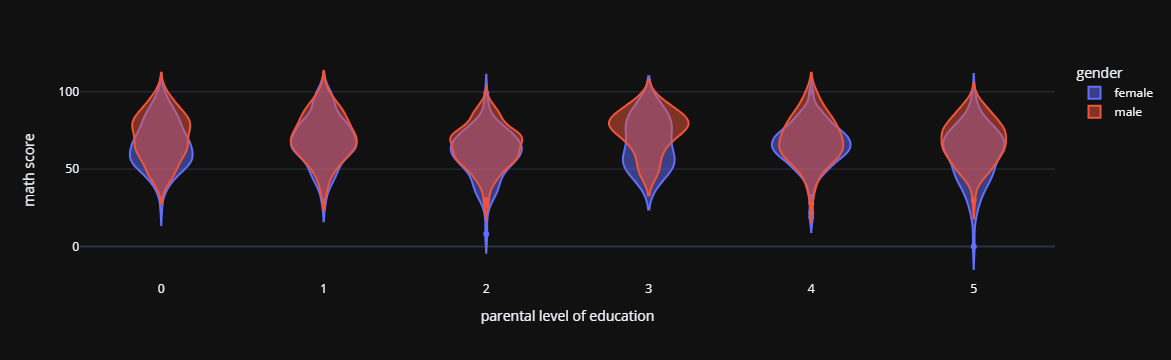

CPU times: total: 31.2 ms
Wall time: 34.4 ms


In [69]:
%%time
# Type 3 : color + violinmode
fig = px.violin(data, x="parental level of education", y="math score", color="gender", violinmode="overlay")
fig.show()

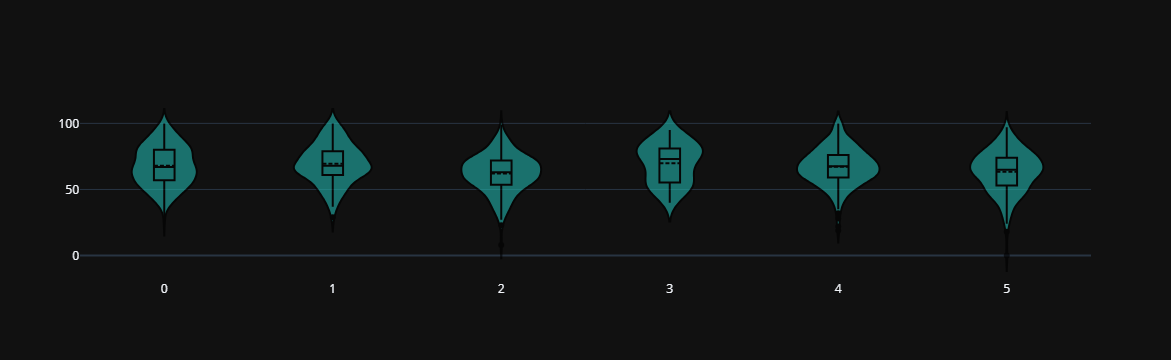

CPU times: total: 0 ns
Wall time: 10 ms


In [70]:
%%time
# Type 4 : go.box usage
fig = go.Figure()

fig.add_trace(
    go.Violin(x=data["parental level of education"], y=data["math score"],
              box_visible=True, # with box plot
              line_color="black",
              meanline_visible=True, # with mean value
              fillcolor="lightseagreen",
              opacity=0.6)
)

fig.show()

## Join Plot

### Seaborn : joinplot

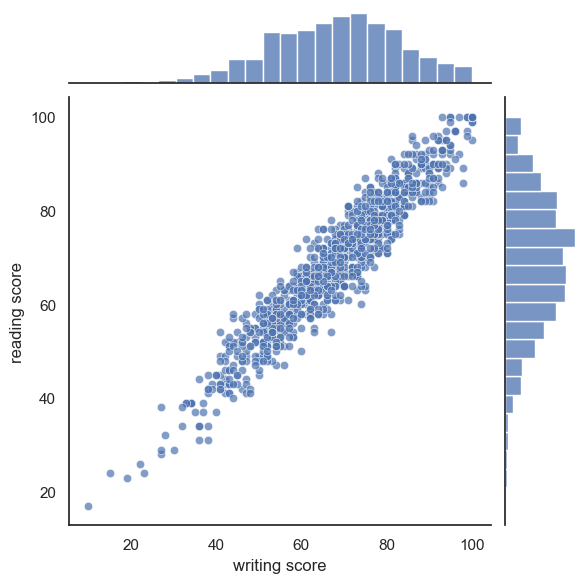

CPU times: total: 312 ms
Wall time: 336 ms


In [74]:
%%time
# Type 1 : default
sns.set(style="white", color_codes=True) # suitable theme for joinplot
sns.jointplot(data=data, x="writing score", y="reading score", alpha=0.7)
plt.show()

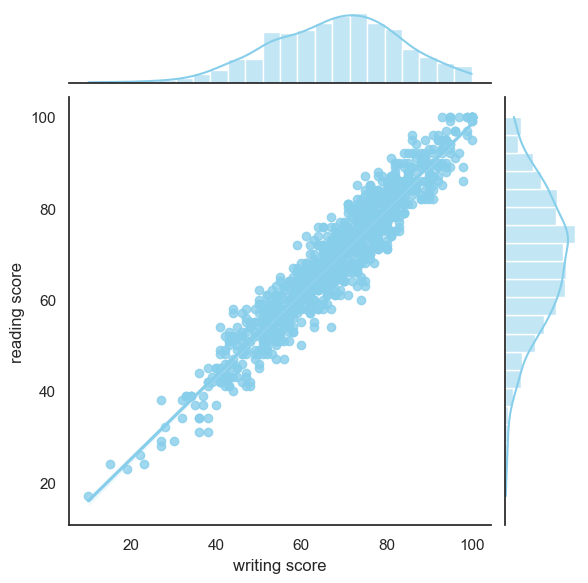

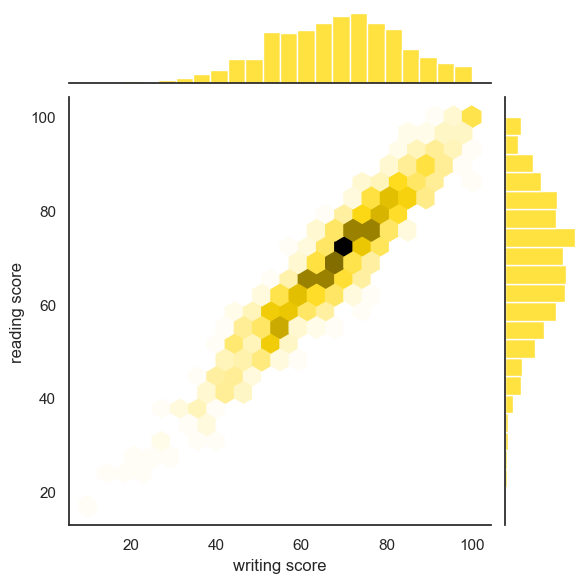

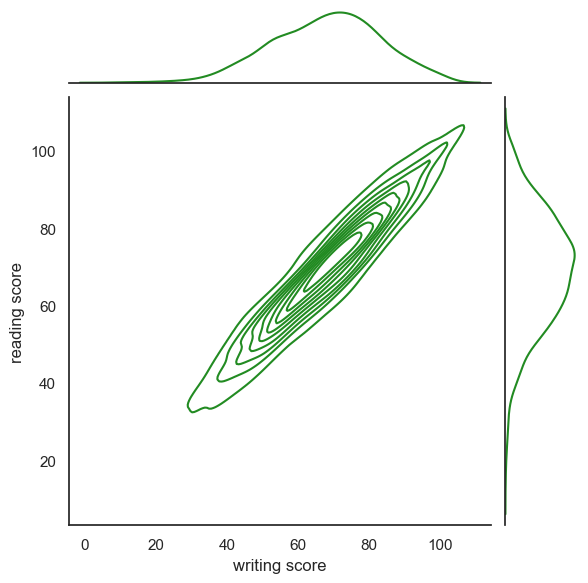

CPU times: total: 2.95 s
Wall time: 3.03 s


In [76]:
%%time
# Type 2 : many types (reg, hex, kde)
sns.jointplot(data=data, x="writing score", y="reading score", kind="reg", color="skyblue")
sns.jointplot(data=data, x="writing score", y="reading score", kind="hex", color="gold")
sns.jointplot(data=data, x="writing score", y="reading score", kind="kde", color="forestgreen")
plt.show()

### Plotly : go.Histogram, go.Histogram2dContour, go.Scatter

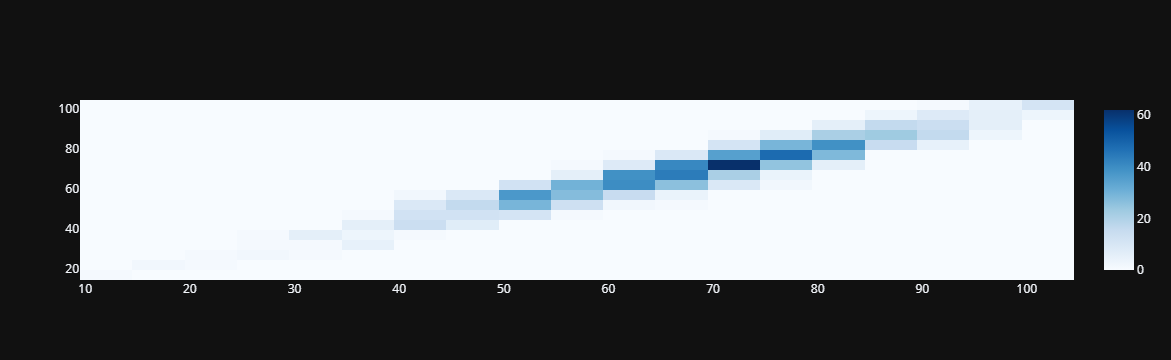

CPU times: total: 15.6 ms
Wall time: 9 ms


In [77]:
%%time
# Type 1 : 2d histogram + such as heatmap
fig = go.Figure()
fig.add_trace(go.Histogram2d(
    x=data["writing score"], y=data["reading score"],
    nbinsx=30, nbinsy=30, colorscale="Blues"
))

fig.show()

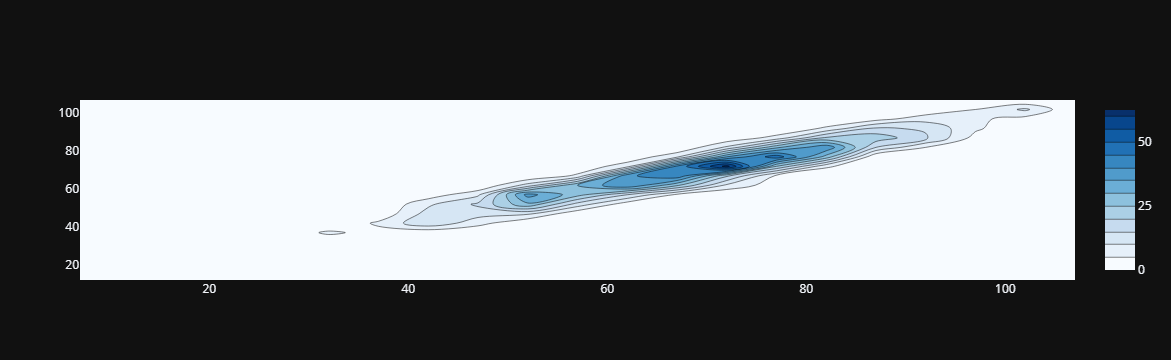

CPU times: total: 15.6 ms
Wall time: 8 ms


In [78]:
%%time
# Type 2 : 2d histogram countour
fig = go.Figure()
fig.add_trace(go.Histogram2dContour(
    x=data["writing score"], y=data["reading score"],
    nbinsx=30, nbinsy=30, colorscale="Blues"
))

fig.show()

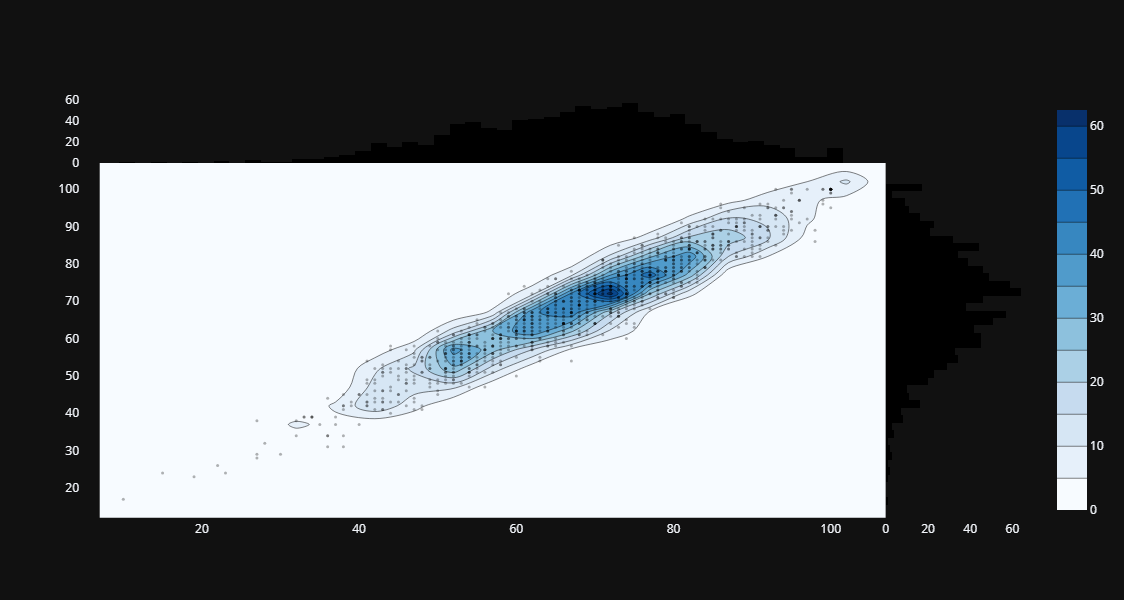

CPU times: total: 15.6 ms
Wall time: 14 ms


In [81]:
%%time
# Type 3 : Histogram2dCountour + Scatter + Histogram
fig = go.Figure()

fig.add_trace(go.Histogram2dContour(
    x=data["writing score"], y=data["reading score"],
    nbinsx=30, nbinsy=30, colorscale="Blues",
    xaxis="x", yaxis="y"
))

fig.add_trace(go.Scatter(
    x=data["writing score"], y=data["reading score"],
    xaxis="x", yaxis="y", mode="markers",
    marker=dict(
        color="rgba(0,0,0,0.3)",
        size=3
    )
))

# Side dist
fig.add_trace(go.Histogram(
    y=data["reading score"],
    xaxis="x2",
    marker=dict(
        color="rgba(0,0,0,1)"
    )
))

# Side dist
fig.add_trace(go.Histogram(
    x=data["writing score"],
    yaxis="y2",
    marker=dict(
        color="rgba(0,0,0,1)"
    )
))

fig.update_layout(
    autosize=False,
    xaxis=dict(
        zeroline=False,
        domain=[0,0.85],
        showgrid=False
    ),
    yaxis=dict(
        zeroline=False,
        domain=[0,0.85],
        showgrid=False
    ),
    xaxis2=dict(
        zeroline=False,
        domain=[0.85,1],
        showgrid=False
    ),
    yaxis2=dict(
        zeroline=False,
        domain=[0.85,1],
        showgrid=False
    ),
    height=600,
    width=600,
    bargap=0,
    hovermode="closest",
    showlegend=False
)

fig.show()

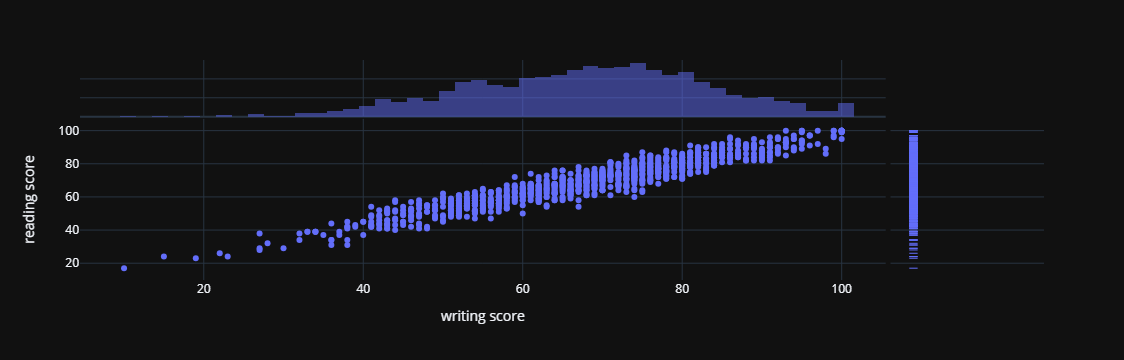

CPU times: total: 78.1 ms
Wall time: 94 ms


In [83]:
%%time
# Type 4 : marginal_x & marginal_y
fig = px.scatter(data, x="writing score", y="reading score", marginal_y="rug", marginal_x="histogram")
fig.show()

## ETC

### Plotly : px.treemap, px.sunburst

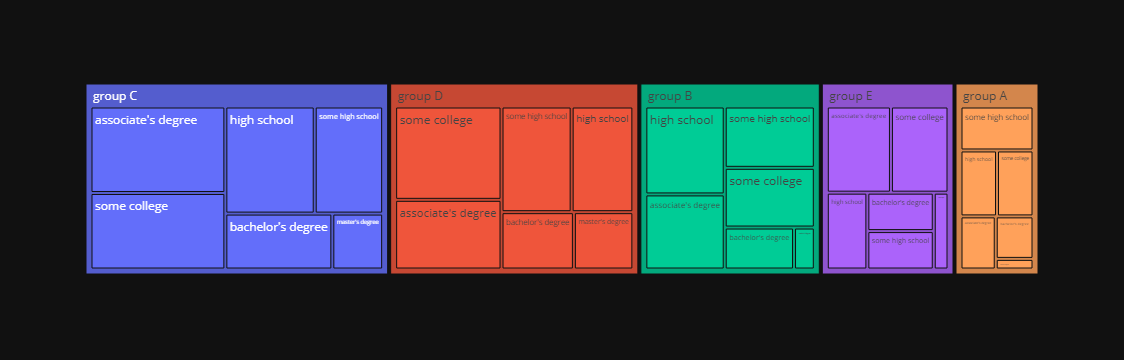

In [87]:
data = pd.read_csv('StudentsPerformance.csv')
data['total'] = 1
fig = px.treemap(data, path=['race/ethnicity', 'parental level of education'], values='total')
fig.show()

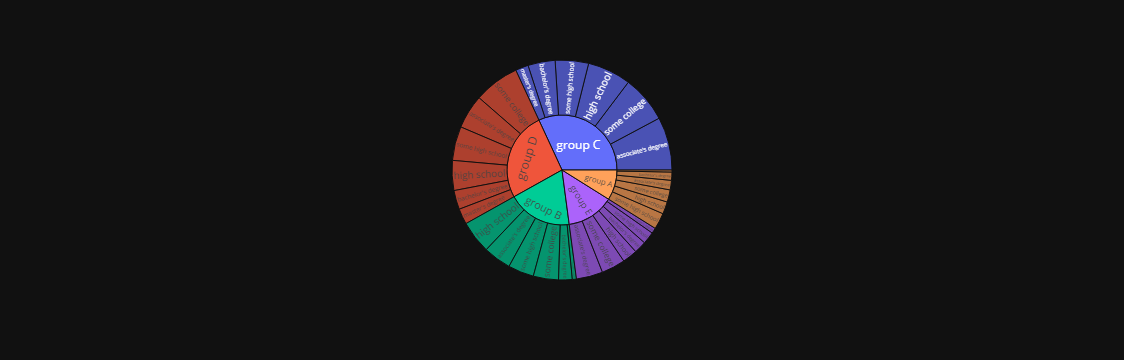

In [88]:
fig = px.sunburst(data, path=['race/ethnicity', 'parental level of education'], values='total')
fig.show()